In [1]:
#import statements
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.svm import SVR
import seaborn as sns
import sklearn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#NN
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, History
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

import kerastuner as kt
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
#import adam
from keras.optimizers import Adam

warnings.filterwarnings('ignore')

2024-12-09 13:25:44.898296: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-09 13:25:44.992841: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-09 13:25:45.018158: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-09 13:25:45.181150: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-09 13:25:46.563620: W tensorflow/compiler/tf2

In [2]:
vector_df = pd.read_csv('interaction_vectors.csv')

In [3]:
physicochemical_df = pd.read_csv('features.csv')

In [4]:
#rename Ids to ID
physicochemical_df = physicochemical_df.rename(columns={'Ids': 'ID'})

In [7]:
merged_df = pd.merge(vector_df,physicochemical_df, on='ID', how='inner')

In [8]:
merged_df = merged_df.reset_index(drop=True)
merged_df

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,PD_neutral,PD_heteroatom,PD_OH,PA_amide,PA_negative,PA_neutral,PA_aromatic,Free energy_y,P_logp,P_MR
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,23.0,5.0,4.0,1.0,-5.874825,-0.665612,29.440791
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,4.0,0.0,2.0,6.0,6.0,4.0,7.0,-5.072544,-0.403714,34.962933
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,3.0,9.0,9.0,10.0,7.0,-7.070675,-0.619947,36.111405
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,1.0,4.0,12.0,11.0,10.0,5.0,-6.727787,-0.498970,31.695033
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,5.0,1.0,6.0,16.0,13.0,10.0,9.0,-13.859616,-0.503965,34.127585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,4.0,1.0,5.0,11.0,8.0,7.0,-6.911863,-0.312883,38.029828
5208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,5.0,4.0,2.0,8.0,-5.577268,-0.570889,33.634874
5209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,1.0,3.0,6.0,5.0,5.0,8.0,-8.272838,-0.393956,34.876296
5210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,2.0,9.0,3.0,4.0,4.0,-10.960875,-0.186890,36.583310


In [9]:
merged_df.columns

Index(['0_x', '1_x', '2_x', '3_x', '4_x', '5_x', '6_x', '7_x', '8_x', '9_x',
       ...
       'PD_neutral', 'PD_heteroatom', 'PD_OH', 'PA_amide', 'PA_negative',
       'PA_neutral', 'PA_aromatic', 'Free energy_y', 'P_logp', 'P_MR'],
      dtype='object', length=381)

In [49]:
X = merged_df.drop(columns=['ID', 'Free energy_y', 'Free energy_x', 'Free energy'])
y = merged_df['Free energy']

In [50]:
X

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,PD_positive,PD_neutral,PD_heteroatom,PD_OH,PA_amide,PA_negative,PA_neutral,PA_aromatic,P_logp,P_MR
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,23.0,5.0,4.0,1.0,-0.665612,29.440791
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,9.0,4.0,0.0,2.0,6.0,6.0,4.0,7.0,-0.403714,34.962933
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,0.0,3.0,9.0,9.0,10.0,7.0,-0.619947,36.111405
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,5.0,1.0,4.0,12.0,11.0,10.0,5.0,-0.498970,31.695033
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,9.0,5.0,1.0,6.0,16.0,13.0,10.0,9.0,-0.503965,34.127585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,8.0,4.0,1.0,5.0,11.0,8.0,7.0,-0.312883,38.029828
5208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,5.0,0.0,0.0,5.0,4.0,2.0,8.0,-0.570889,33.634874
5209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,6.0,1.0,3.0,6.0,5.0,5.0,8.0,-0.393956,34.876296
5210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,2.0,9.0,3.0,4.0,4.0,-0.186890,36.583310


In [51]:
y_scaler = StandardScaler().fit(y.values.reshape(-1, 1))
y_scaled = y_scaler.transform(y.values.reshape(-1, 1))
x_scaled = StandardScaler().fit(X).transform(X)
#Split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

y_test_unscaled = y_scaler.inverse_transform(y_test)


In [52]:
#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)


In [53]:
#unscale the predictions
y_pred_unscaled = y_scaler.inverse_transform(y_pred)
print('Linear Regression')
print('Mean Squared Error:', mean_squared_error(y_test_unscaled, y_pred_unscaled))
print('R2 Score:', r2_score(y_test_unscaled, y_pred_unscaled))


Linear Regression
Mean Squared Error: 2.7485263515451794e+26
R2 Score: -3.902891602852306e+25


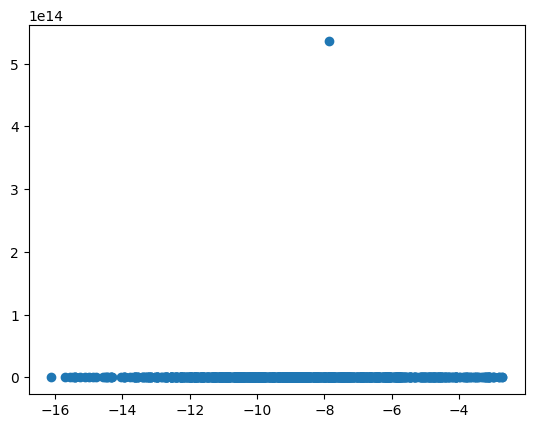

In [54]:
plt.plot(y_test_unscaled, y_pred_unscaled, 'o')

In [55]:
#SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)


In [56]:
y_pred_unscaled = y_scaler.inverse_transform(y_pred.reshape(-1, 1))
print('SVR')
print('Mean Squared Error:', mean_squared_error(y_test_unscaled, y_pred_unscaled))
print('R2 Score:', r2_score(y_test_unscaled, y_pred_unscaled))


SVR
Mean Squared Error: 3.515381456908748
R2 Score: 0.5008178560384331


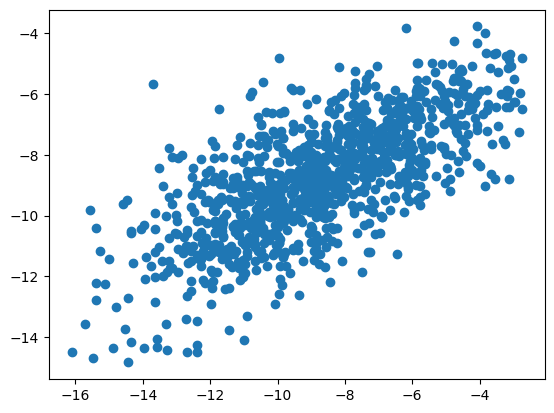

In [57]:
plt.plot(y_test_unscaled, y_pred_unscaled, 'o')

In [58]:
#Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

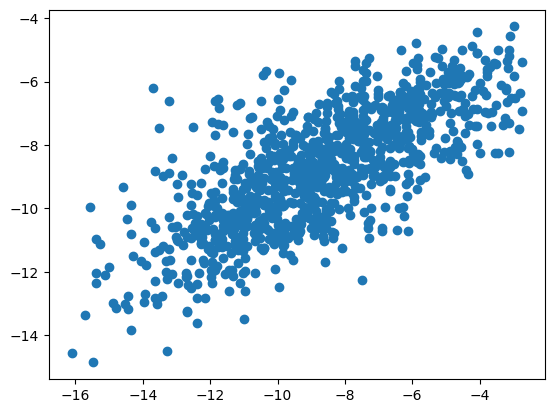

In [60]:
plt.plot(y_test_unscaled, y_pred_unscaled, 'o')

In [59]:
y_pred_unscaled = y_scaler.inverse_transform(y_pred.reshape(-1, 1))
print('RF')
print('Mean Squared Error:', mean_squared_error(y_test_unscaled, y_pred_unscaled))
print('R2 Score:', r2_score(y_test_unscaled, y_pred_unscaled))


RF
Mean Squared Error: 3.2535297067699576
R2 Score: 0.5380006538760571


In [64]:
#XGboost
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [65]:
y_pred_unscaled = y_scaler.inverse_transform(y_pred.reshape(-1, 1))
print('XGBoost')
print('Mean Squared Error:', mean_squared_error(y_test_unscaled, y_pred_unscaled))
print('R2 Score:', r2_score(y_test_unscaled, y_pred_unscaled))


XGBoost
Mean Squared Error: 3.419215453595096
R2 Score: 0.5144733731704307


In [67]:
#SVM 
svm_preds = {}
svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')
svr_lin.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)


SVR(kernel='poly')

In [68]:
svm_preds['linear_svr_pred'] = svr_lin.predict(X_test)
svm_preds['rbf_svr_pred'] = svr_rbf.predict(X_test)
svm_preds['poly_svr_pred'] = svr_poly.predict(X_test)
svm_preds['linear_svr_pred'] = y_scaler.inverse_transform(svm_preds['linear_svr_pred'].reshape(-1, 1))
svm_preds['rbf_svr_pred'] = y_scaler.inverse_transform(svm_preds['rbf_svr_pred'].reshape(-1, 1))
svm_preds['poly_svr_pred'] = y_scaler.inverse_transform(svm_preds['poly_svr_pred'].reshape(-1, 1))
print("SVM")
print("Linear SVR R2:", r2_score(y_test_unscaled, svm_preds['linear_svr_pred']))
print("RBF SVR R2:", r2_score(y_test_unscaled, svm_preds['rbf_svr_pred']))
print("Poly SVR R2:", r2_score(y_test_unscaled, svm_preds['poly_svr_pred']))
print("Linear SVR MSE:", mean_squared_error(y_test_unscaled, svm_preds['linear_svr_pred']))
print("RBF SVR MSE:", mean_squared_error(y_test_unscaled, svm_preds['rbf_svr_pred']))
print("Poly SVR MSE:", mean_squared_error(y_test_unscaled, svm_preds['poly_svr_pred']))

SVM
Linear SVR R2: 0.36217069020481685
RBF SVR R2: 0.5008178560384331
Poly SVR R2: 0.20699230847144579
Linear SVR MSE: 4.491773905477527
RBF SVR MSE: 3.515381456908748
Poly SVR MSE: 5.584583839201038
